In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Han Santteut Dotum'   #한글 사용 가능

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 50
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('C:/Users/chowonjae/Desktop/jeju_data_ver1/201901-202003.csv')
data = data.fillna('')

## 데이터 형태

REG_YYMM : 년월 

CARD_SIDO_NM : 카드이용지역_시도 (가맹점 주소 기준)

CARD_CCG_NM : 카드이용지역_시군구 (가맹점 주소 기준)

STD_CLSS_NM : 업종명

HOM_SIDO_NM : 거주지역_시도 (고객 집주소 기준)

HOM_CCG_NM : 거주지역_시군구 (고객 집주소 기준)

AGE : 연령대

SEX_CTGO_CD : 성별 (1: 남성, 2: 여성)

FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)

CSTMR_CNT : 이용고객수 (명)

AMT : 이용금액 (원)

CNT : 이용건수 (건)

In [3]:
data["DATE"] = pd.to_datetime(data["REG_YYMM"],format='%Y%m')

In [3]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [4]:
df = data.copy()
df = df[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
df = df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [148]:
submission = pd.read_csv('C:/Users/chowonjae/Desktop/jeju_data_ver1/submission.csv', index_col=0)
submission = submission.loc[submission['REG_YYMM']==202004]
submission = submission[['CARD_SIDO_NM', 'STD_CLSS_NM']]
REG_YYMMs = np.sort(data['REG_YYMM'].unique())
STD_CLSS_NMs = data["STD_CLSS_NM"].unique()
CARD_SIDO_NMs = data["CARD_SIDO_NM"].unique()

In [16]:
REG_YYMMs = np.sort(data['REG_YYMM'].unique())
STD_CLSS_NMs = data["STD_CLSS_NM"].unique()
CARD_SIDO_NMs = data["CARD_SIDO_NM"].unique()

In [7]:
df_yc_sum = df.loc[df["STD_CLSS_NM"] == "건강보조식품 소매업"].groupby(["REG_YYMM", "CARD_SIDO_NM"]).sum()

[148354746, 146715871, 109439025, 106548473, 148115738, 97960089, 92505731, 99023125, 205353608, 115917681, 98084641, 95232313, 185008768, 76505561, 96059012]


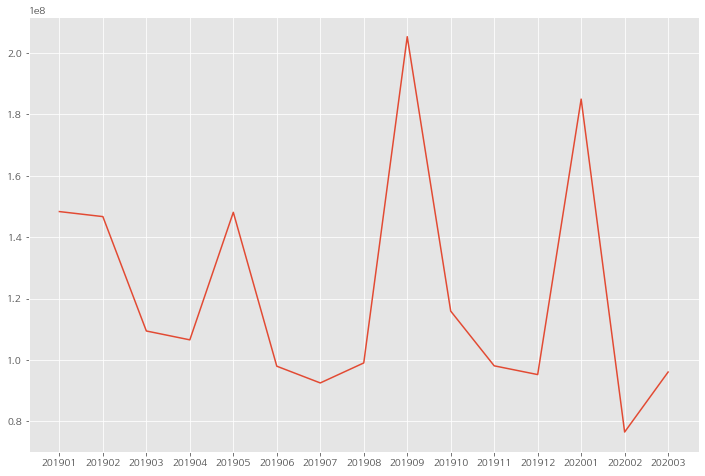

In [8]:
#강원도 건강보조식품 소매업
tmp_kw= []
for reg in REG_YYMMs:
    tmp_kw.append(df_yc_sum.loc[reg, "강원"].AMT)
print(tmp_kw)
fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(x = range(0,len(REG_YYMMs)), y = tmp_kw)
ax.set_xticks(range(0,len(REG_YYMMs)))
ax.set_xticklabels(REG_YYMMs.astype(str))
plt.show()

In [160]:
def month_plot(data, STD_CLSS_NMs, REG_YYMMs, CARD_SIDO_NMs, normalize = False):
    
    date_data = data.copy()
    date_data["date"] = pd.to_datetime(date_data["REG_YYMM"],format='%Y%m')
    
    fig, ax = plt.subplots(round(len(STD_CLSS_NMs) / 2), 2,figsize = (30, 20))
    axes = ax.flatten()
    
    for ax, STD_CLSS_NM in zip(axes, STD_CLSS_NMs):
        date_data_std = date_data[date_data["STD_CLSS_NM"] == STD_CLSS_NM]
        if normalize:
            date_data_std["AMT"] = date_data_std.groupby("CARD_SIDO_NM")["AMT"].apply(lambda d : (d - np.mean(d)) / np.std(d)) 
        
        sns.lineplot(x = "date", y = "AMT", hue = "CARD_SIDO_NM", data = date_data_std, palette = "husl", ax = ax,estimator = "sum", legend = False)
        ax.set_title("{} 월별 이용 금액 추이".format(STD_CLSS_NM))
        ax.set_xticks(range(0,len(REG_YYMMs)))
        ax.set_xticklabels(REG_YYMMs.astype(str))
        
    plt.tight_layout()
    plt.show()

In [171]:
date_data = data.copy()
date_data["date"] = pd.to_datetime(date_data["REG_YYMM"],format='%Y%m')
date_data_std = date_data[date_data["STD_CLSS_NM"] == "골프장 운영업"]
date_data_std["AMT"] = date_data_std.groupby("CARD_SIDO_NM")["AMT"].apply(lambda d : (d - np.mean(d)) / np.std(d))

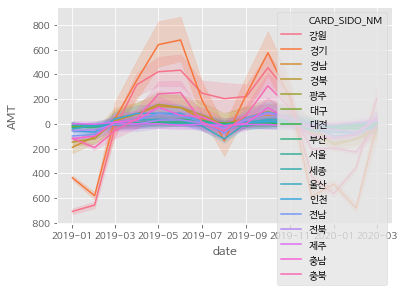

In [172]:
sns.lineplot(x = "date", y = "AMT", hue = "CARD_SIDO_NM", data = date_data_std, palette = "husl",estimator = "sum")

In [11]:
#거주 지역과 카드 사용 지역이 같은 경우와 다른 경우

# "Local" : "지역주민", "외지인" feature 추가

data["Local"] = "외지인"
mask = (data["CARD_SIDO_NM"] == data["HOM_SIDO_NM"])
data.loc[mask, "Local"] = "지역주민"

In [12]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,Local
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,지역주민
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,지역주민
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,지역주민
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,지역주민
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,지역주민


In [19]:
df_rg_lc = data.groupby("Local")["CARD_SIDO_NM"].value_counts().to_frame()

In [20]:
df_lc = data.groupby("Local")["CARD_SIDO_NM"].count().to_frame()

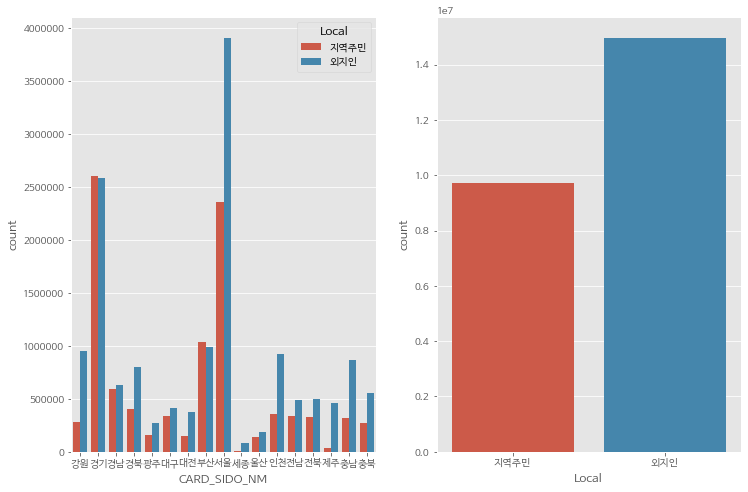

In [174]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
y_tmp = data.groupby("CARD_SIDO_NM").size().index
x_tmp = data.groupby("CARD_SIDO_NM").size().to_list()
sns.countplot("CARD_SIDO_NM", hue = "Local", data = data, ax = ax[0])
sns.countplot("Local", data = data,ax = ax[1])

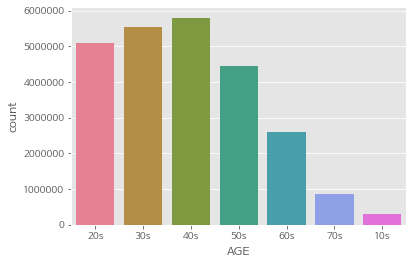

In [100]:
#AGE

sns.countplot("AGE", data = data, palette = "husl")

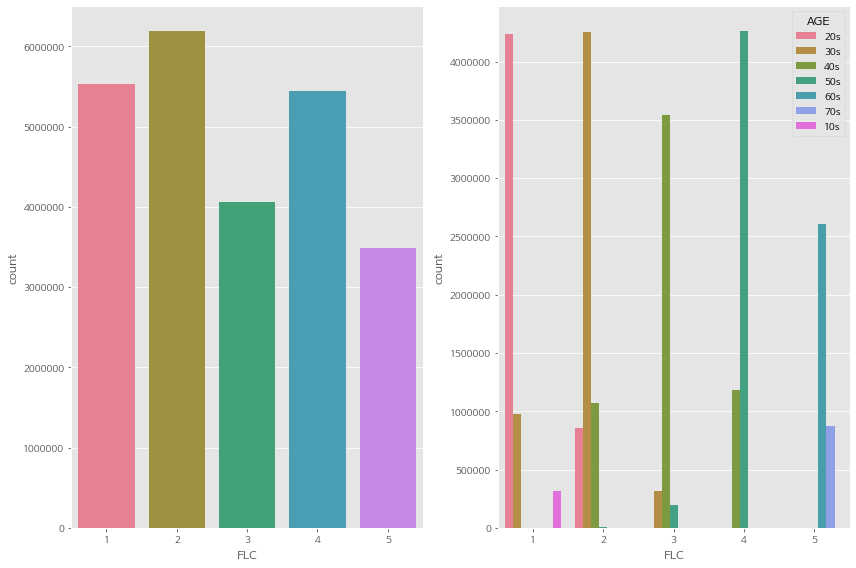

In [13]:
#세대 주기

fig, ax = plt.subplots(1,2, figsize= (12, 8))
sns.countplot("FLC", data= data, palette = "husl", ax = ax[0])
sns.countplot("FLC", hue = "AGE", data = data, palette = "husl", ax = ax[1])
plt.tight_layout()
plt.show()
#(1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)

의문

- 2020년 1월 이후로 가구 별로 소비가 줄어든 폭이 다를까? (가구별로 날짜별 AMT(func:sum) 해서 계산)

In [7]:
# 가구별로 AMT계산

df_flc = data.groupby("FLC")["AMT"].sum().to_frame().style.background_gradient(cmap = "summer_r")
df_flc

# 성인 자녀 가구가 가장 많이 사용(가장 돈을 많이 쓰는 연령대인 50대가 가장 많이 포함되어 있기 때문인것 같다.)

,AMT
FLC,
1,7371507278072
2,12619055902225
3,11538603588734
4,17864707502682
5,10902152777293


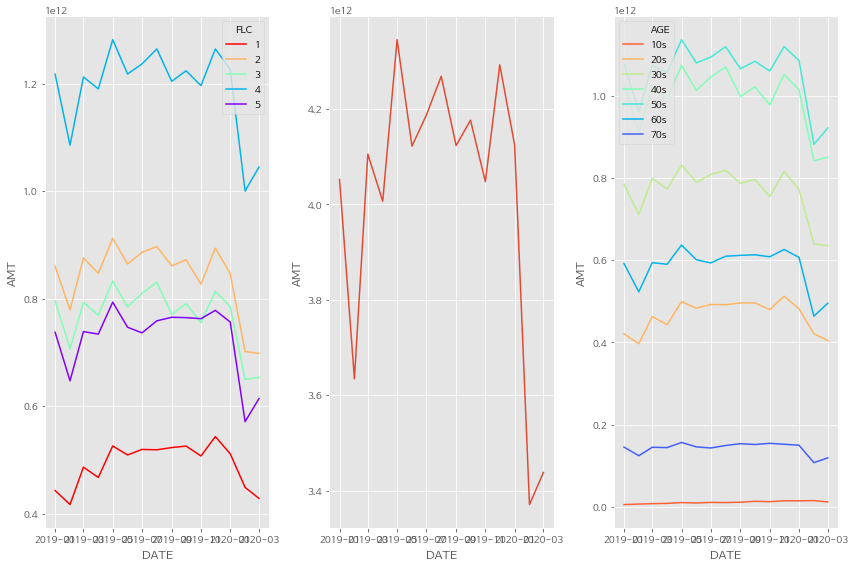

In [12]:
#가구별로 날짜에 따른 AMT 계산

fig, ax = plt.subplots(1,3, figsize = (12,8))
df_flc_reg = data.groupby(["DATE", "FLC"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_flc_reg = df_flc_reg.reset_index()
sns.lineplot(x= "DATE", y = "AMT", hue = "FLC", data = df_flc_reg, palette = 'rainbow_r', ax = ax[0])
ax[0].legend(title = "FLC", labels = [1,2,3,4,5])
df_amt = data.groupby("DATE")["AMT"].sum().to_frame().rename(columns = {0 : "AMT"}).reset_index()
sns.lineplot(x = "DATE", y = "AMT", data = df_amt, ax= ax[1])
df_amt_age = data.groupby(["DATE", "AGE"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"}).reset_index()
sns.lineplot(x = "DATE", y = "AMT", hue = "AGE", data = df_amt_age, palette = 'rainbow_r', ax = ax[2])
ax[2].legend(loc = "upper left")
plt.tight_layout()
plt.show()
## 성안자녀가구의 이용금액의 추세를 예측하는 것도 좋은 방법일듯.

In [6]:
df_amt = data.groupby("DATE")["AMT"].sum().to_frame().rename(columns = {0 : "AMT"}).reset_index()
df_amt.head()

,DATE,AMT
0,2019-01-01,4052317259025
1,2019-02-01,3634345832156
2,2019-03-01,4105409759731
3,2019-04-01,4006698507386
4,2019-05-01,4345471235813


- 영유아자녀가구, 중고생자녀가구는 거의 유지. (생필품에만 돈을 사용한 경우가 많을 듯?)
- 1인 가구는 3월로 갈수록 지출이 줄었음.

In [151]:
df_flc = data[(data["FLC"] == 1)]
df_flc_reg_part = df_flc.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_flc_reg_part = df_flc_reg_part.reset_index()
df_reg_part = df_flc_reg_part[(df_flc_reg_part["DATE"] == "2020-02-01") | (df_flc_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    tmp = df_reg_part.loc[std]
    df_reg_part.loc[std, "DIff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values


In [158]:
df_reg_part[df_reg_part["DIff"] > 0]

Index(['골프장 운영업', '과실 및 채소 소매업', '그외 기타 분류안된 오락관련 서비스업', '그외 기타 종합 소매업',
       '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타음식료품위주종합소매업', '내항 여객 운송업',
       '빵 및 과자류 소매업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '육류 소매업',
       '자동차 임대업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업'],
      dtype='object', name='STD_CLSS_NM')

In [153]:
#영유아자녀가구, 중고생자녀가구는 거의 유지. (생필품에만 돈을 사용한 경우가 많을 듯?)
#fig, ax = plt.subplots(figsize = (20, 40))
df_flc = data[(data["FLC"] == 2)]
df_flc_reg_part = df_flc.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_flc_reg_part = df_flc_reg_part.reset_index()
df_reg_part = df_flc_reg_part[(df_flc_reg_part["DATE"] == "2020-02-01") | (df_flc_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    tmp = df_reg_part.loc[std]
    df_reg_part.loc[std, "DIff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values


In [154]:
df_reg_part[df_reg_part["DIff"] < 0]

,DATE,AMT,DIff
STD_CLSS_NM,,,
건강보조식품 소매업,2020-02-01,636716444,-6.984585e+07
관광 민예품 및 선물용품 소매업,2020-02-01,48987176,-1.580251e+07
그외 기타 분류안된 오락관련 서비스업,2020-02-01,695250,-4.164500e+05
그외 기타 스포츠시설 운영업,2020-02-01,27880030,-1.642153e+07
기타 외국식 음식점업,2020-02-01,7216642417,-9.985908e+08
기타 주점업,2020-02-01,837047594,-1.162103e+08
마사지업,2020-02-01,272330508,-7.483818e+07
면세점,2020-02-01,3192024626,-2.066096e+09
버스 운송업,2020-02-01,1615647700,-7.569057e+08


In [149]:
df_reg_part[df_reg_part["DIff"] > 0]

,DATE,AMT,DIff
STD_CLSS_NM,,,
건강보조식품 소매업,2020-02-01,2104714792,2.938343e+08
골프장 운영업,2020-02-01,4983508169,5.514879e+09
과실 및 채소 소매업,2020-02-01,10419231149,2.816335e+09
그외 기타 종합 소매업,2020-02-01,12515275712,2.481266e+09
기타 대형 종합 소매업,2020-02-01,65248828008,9.100958e+09
기타 수상오락 서비스업,2020-02-01,207000,2.580025e+06
기타음식료품위주종합소매업,2020-02-01,24490533060,7.738180e+09
내항 여객 운송업,2020-02-01,243301200,1.980020e+07
빵 및 과자류 소매업,2020-02-01,6930529780,1.212177e+09


In [155]:
df_flc = data[(data["FLC"] == 3)]
df_flc_reg_part = df_flc.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_flc_reg_part = df_flc_reg_part.reset_index()
df_reg_part = df_flc_reg_part[(df_flc_reg_part["DATE"] == "2020-02-01") | (df_flc_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    tmp = df_reg_part.loc[std]
    df_reg_part.loc[std, "DIff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values


In [156]:
df_reg_part[df_reg_part["DIff"] < 0]

,DATE,AMT,DIff
STD_CLSS_NM,,,
건강보조식품 소매업,2020-02-01,695758040,-5.313810e+07
관광 민예품 및 선물용품 소매업,2020-02-01,57439140,-1.693375e+07
그외 기타 스포츠시설 운영업,2020-02-01,38523900,-2.652790e+07
기타 외국식 음식점업,2020-02-01,6721258836,-1.007964e+09
기타 주점업,2020-02-01,1216329325,-1.364483e+08
마사지업,2020-02-01,274956187,-8.321952e+07
면세점,2020-02-01,2709303892,-1.924055e+09
버스 운송업,2020-02-01,1028649980,-5.519836e+08
비알콜 음료점업,2020-02-01,10853565054,-4.455255e+08


In [142]:
df_flc = data[(data["FLC"] == 4)]
df_flc_reg_part = df_flc.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_flc_reg_part = df_flc_reg_part.reset_index()
df_reg_part = df_flc_reg_part[(df_flc_reg_part["DATE"] == "2020-02-01") | (df_flc_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    try:
        tmp = df_reg_part.loc[std]
        df_reg_part.loc[std, "DIff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values
    except:
        continue

In [144]:
df_reg_part[df_reg_part["DIff"] > 0]

,DATE,AMT,DIff
STD_CLSS_NM,,,
건강보조식품 소매업,2020-02-01,1833786383,2.522737e+08
골프장 운영업,2020-02-01,9397246102,1.056129e+10
과실 및 채소 소매업,2020-02-01,11904133838,2.844568e+09
그외 기타 종합 소매업,2020-02-01,16660139957,2.737723e+09
기타 대형 종합 소매업,2020-02-01,114394023197,1.368288e+10
기타 수상오락 서비스업,2020-02-01,14444000,1.186650e+07
기타음식료품위주종합소매업,2020-02-01,30765232116,6.853243e+09
내항 여객 운송업,2020-02-01,518509320,1.066763e+07
빵 및 과자류 소매업,2020-02-01,14390052522,1.966109e+09


In [146]:
df_flc = data[(data["FLC"] == 5)]
df_flc_reg_part = df_flc.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_flc_reg_part = df_flc_reg_part.reset_index()
df_reg_part = df_flc_reg_part[(df_flc_reg_part["DATE"] == "2020-02-01") | (df_flc_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    try:
        tmp = df_reg_part.loc[std]
        df_reg_part.loc[std, "DIff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values
    except:
        continue

In [148]:
df_reg_part[df_reg_part["DIff"] > 0]

,DATE,AMT,DIff
STD_CLSS_NM,,,
건강보조식품 소매업,2020-02-01,2104714792,2.938343e+08
골프장 운영업,2020-02-01,4983508169,5.514879e+09
과실 및 채소 소매업,2020-02-01,10419231149,2.816335e+09
그외 기타 종합 소매업,2020-02-01,12515275712,2.481266e+09
기타 대형 종합 소매업,2020-02-01,65248828008,9.100958e+09
기타 수상오락 서비스업,2020-02-01,207000,2.580025e+06
기타음식료품위주종합소매업,2020-02-01,24490533060,7.738180e+09
내항 여객 운송업,2020-02-01,243301200,1.980020e+07
빵 및 과자류 소매업,2020-02-01,6930529780,1.212177e+09


- 소매업에 속해있는 업종들은 수입이 어느정도 늘었지만 관광업과 공용으로 사용되는 물품이나 장소가 많은 업종은 떨어졌다.
- 코로나와 관계없이 가격이 떨어진 업종도 있을것이다.(계절별이나 명절에 따른 수입의 차이가 큰 경우)

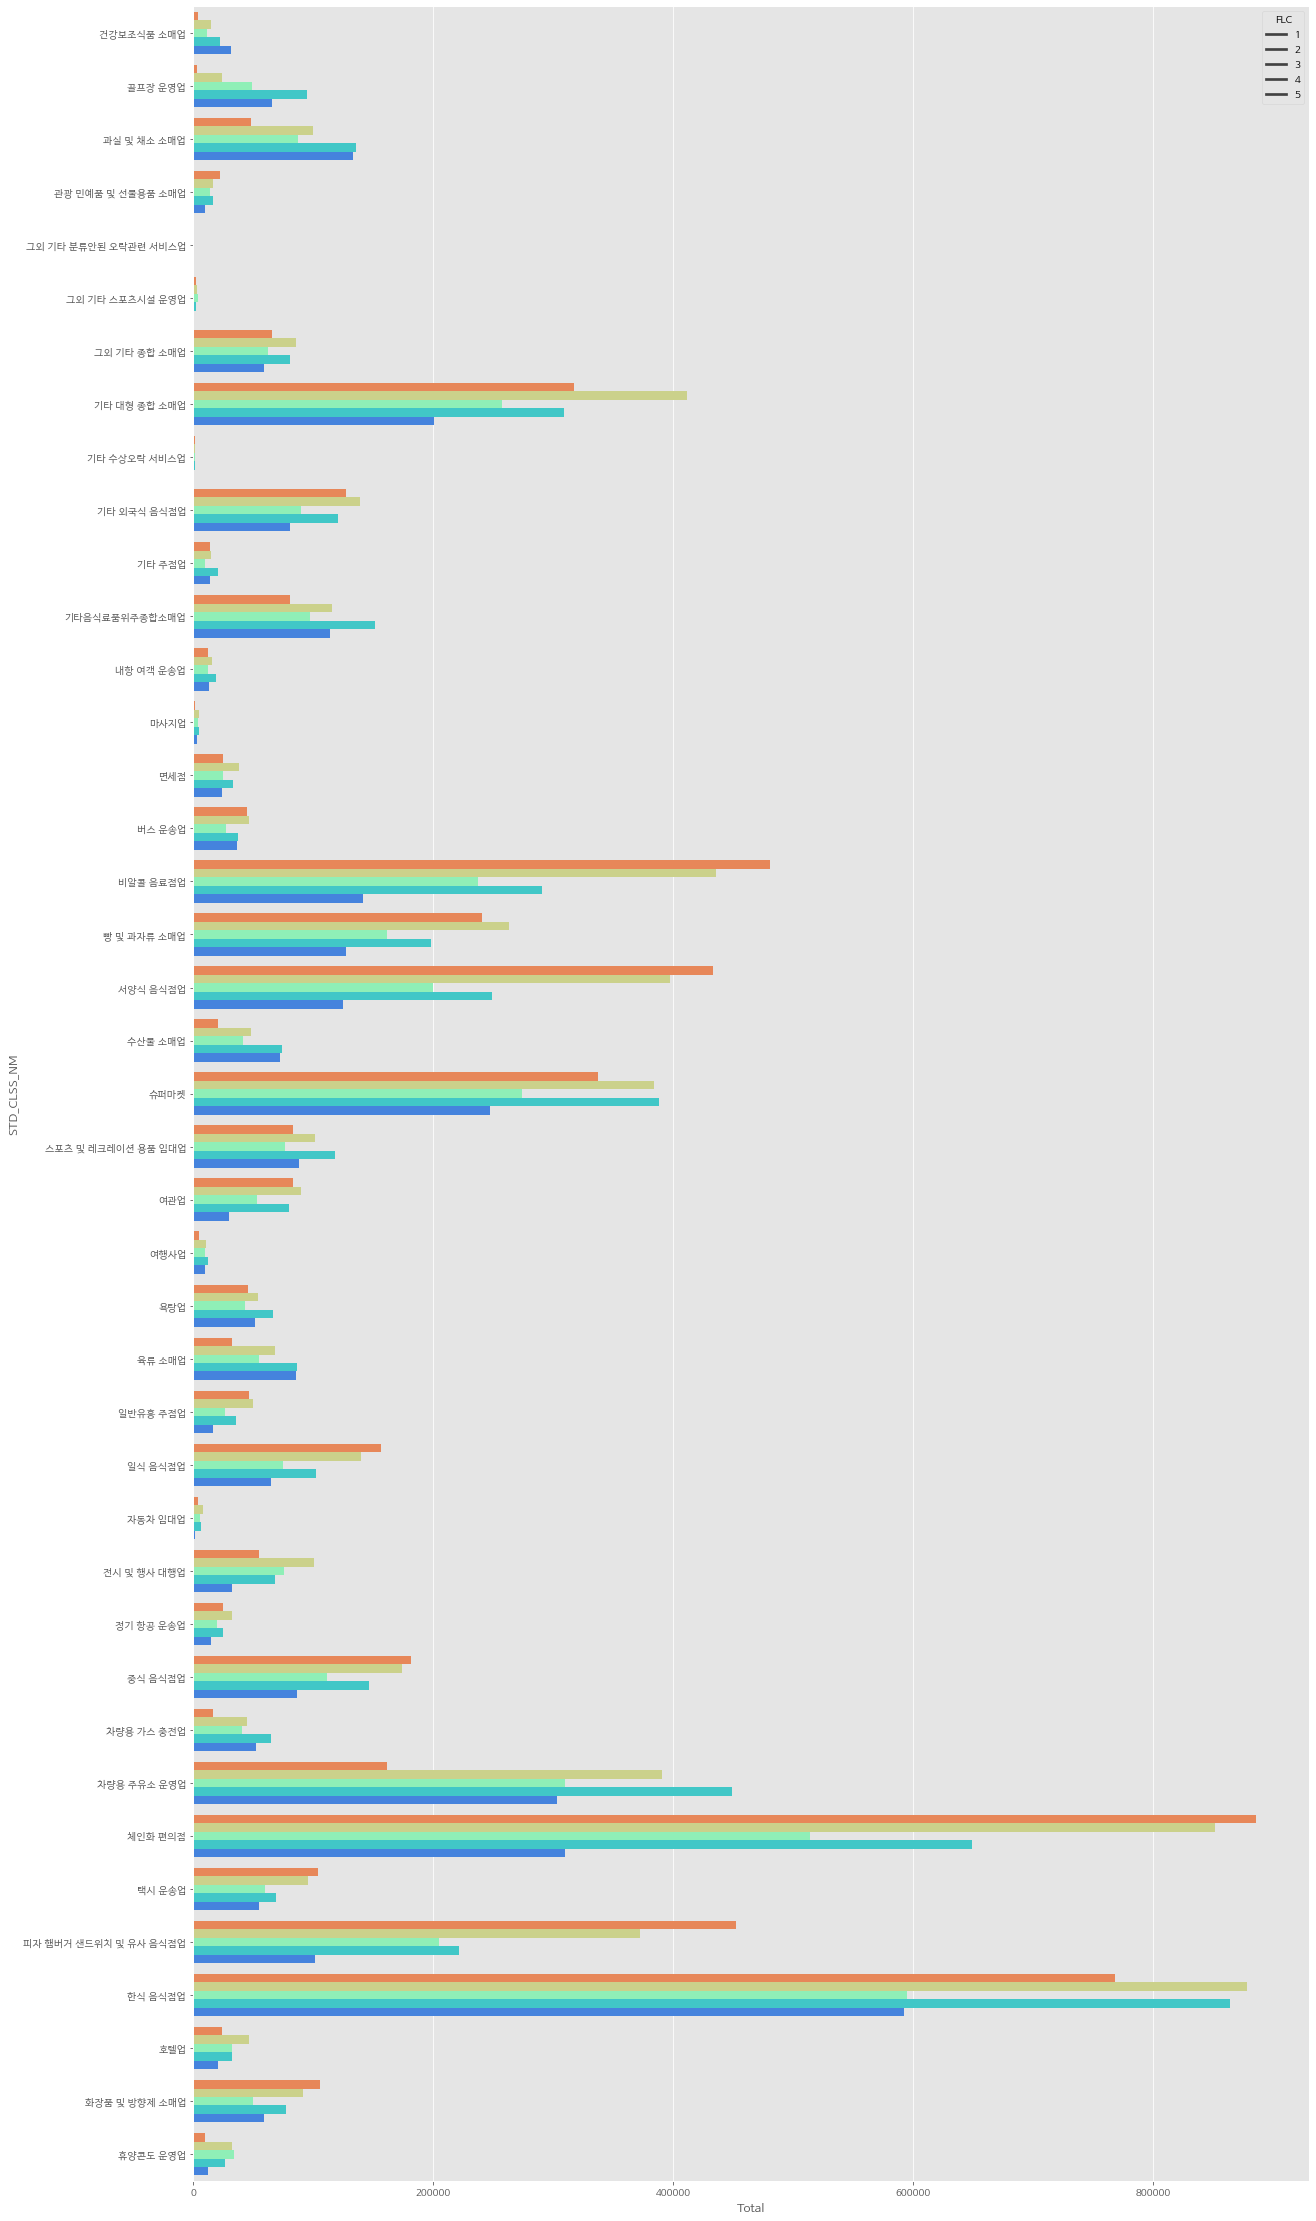

In [53]:
#업종별로 FLC비율

fig, ax = plt.subplots(figsize = (20,40))
df_flc_std = data.groupby(["STD_CLSS_NM", "FLC"]).size().to_frame().rename(columns = {0 : "Total"})
df_flc_std = df_flc_std.reset_index()
sns.barplot(y = "STD_CLSS_NM", x = "Total", hue = "FLC", data = df_flc_std, palette = "rainbow_r")
ax.legend(title = "FLC", labels = [1,2,3,4,5])
plt.show()

In [42]:
df_flc_reg[df_flc_reg["DATE"] == "2020-03"]

,DATE,FLC,AMT
70,2020-03-01,1,428131604077
71,2020-03-01,2,697901165560
72,2020-03-01,3,653304137141
73,2020-03-01,4,1044644589703
74,2020-03-01,5,613902929616


In [183]:
df_age = data[(data["AGE"] == '10s')]
df_age_reg_part = df_age.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_age_reg_part = df_age_reg_part.reset_index()
df_reg_part = df_age_reg_part[(df_age_reg_part["DATE"] == "2020-02-01") | (df_age_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    try:
        tmp = df_reg_part.loc[std]
        df_reg_part.loc[std, "DIff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values
    except:
        continue

In [185]:
df_reg_part[df_reg_part["DIff"] > 0]

,DATE,AMT,DIff
STD_CLSS_NM,,,
건강보조식품 소매업,2020-02-01,76200,9100.0
그외 기타 종합 소매업,2020-02-01,26183980,4915210.0
기타음식료품위주종합소매업,2020-02-01,48244340,7925240.0
내항 여객 운송업,2020-02-01,482790,2026160.0
수산물 소매업,2020-02-01,715090,313160.0
슈퍼마켓,2020-02-01,1070852189,63626632.0
육류 소매업,2020-02-01,24707265,8332266.0
차량용 가스 충전업,2020-02-01,636737,478427.0
차량용 주유소 운영업,2020-02-01,45667785,9319677.0


In [175]:
df_age = data[(data["AGE"] == '20s')]
df_age_reg_part = df_age.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_age_reg_part = df_age_reg_part.reset_index()
df_reg_part = df_age_reg_part[(df_age_reg_part["DATE"] == "2020-02-01") | (df_age_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    tmp = df_reg_part.loc[std]
    df_reg_part.loc[std, "DIff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values


In [176]:
df_reg_part[df_reg_part["DIff"] > 0].index.unique()

Index(['과실 및 채소 소매업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타음식료품위주종합소매업',
       '내항 여객 운송업', '비알콜 음료점업', '빵 및 과자류 소매업', '슈퍼마켓', '육류 소매업', '차량용 가스 충전업',
       '차량용 주유소 운영업'],
      dtype='object', name='STD_CLSS_NM')

In [177]:
df_age = data[(data["AGE"] == '30s')]
df_age_reg_part = df_age.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
df_age_reg_part = df_age_reg_part.reset_index()
df_reg_part = df_age_reg_part[(df_age_reg_part["DATE"] == "2020-02-01") | (df_age_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    tmp = df_reg_part.loc[std]
    df_reg_part.loc[std, "DIff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values


In [178]:
df_reg_part[df_reg_part["DIff"] > 0].index.unique()

Index(['골프장 운영업', '과실 및 채소 소매업', '그외 기타 종합 소매업', '기타 대형 종합 소매업',
       '기타 수상오락 서비스업', '기타음식료품위주종합소매업', '내항 여객 운송업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '육류 소매업', '자동차 임대업',
       '전시 및 행사 대행업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업'],
      dtype='object', name='STD_CLSS_NM')

In [11]:
#연령대에 따른 산업 업종 특징

df_age = data.groupby("AGE")["STD_CLSS_NM"].value_counts().to_frame()

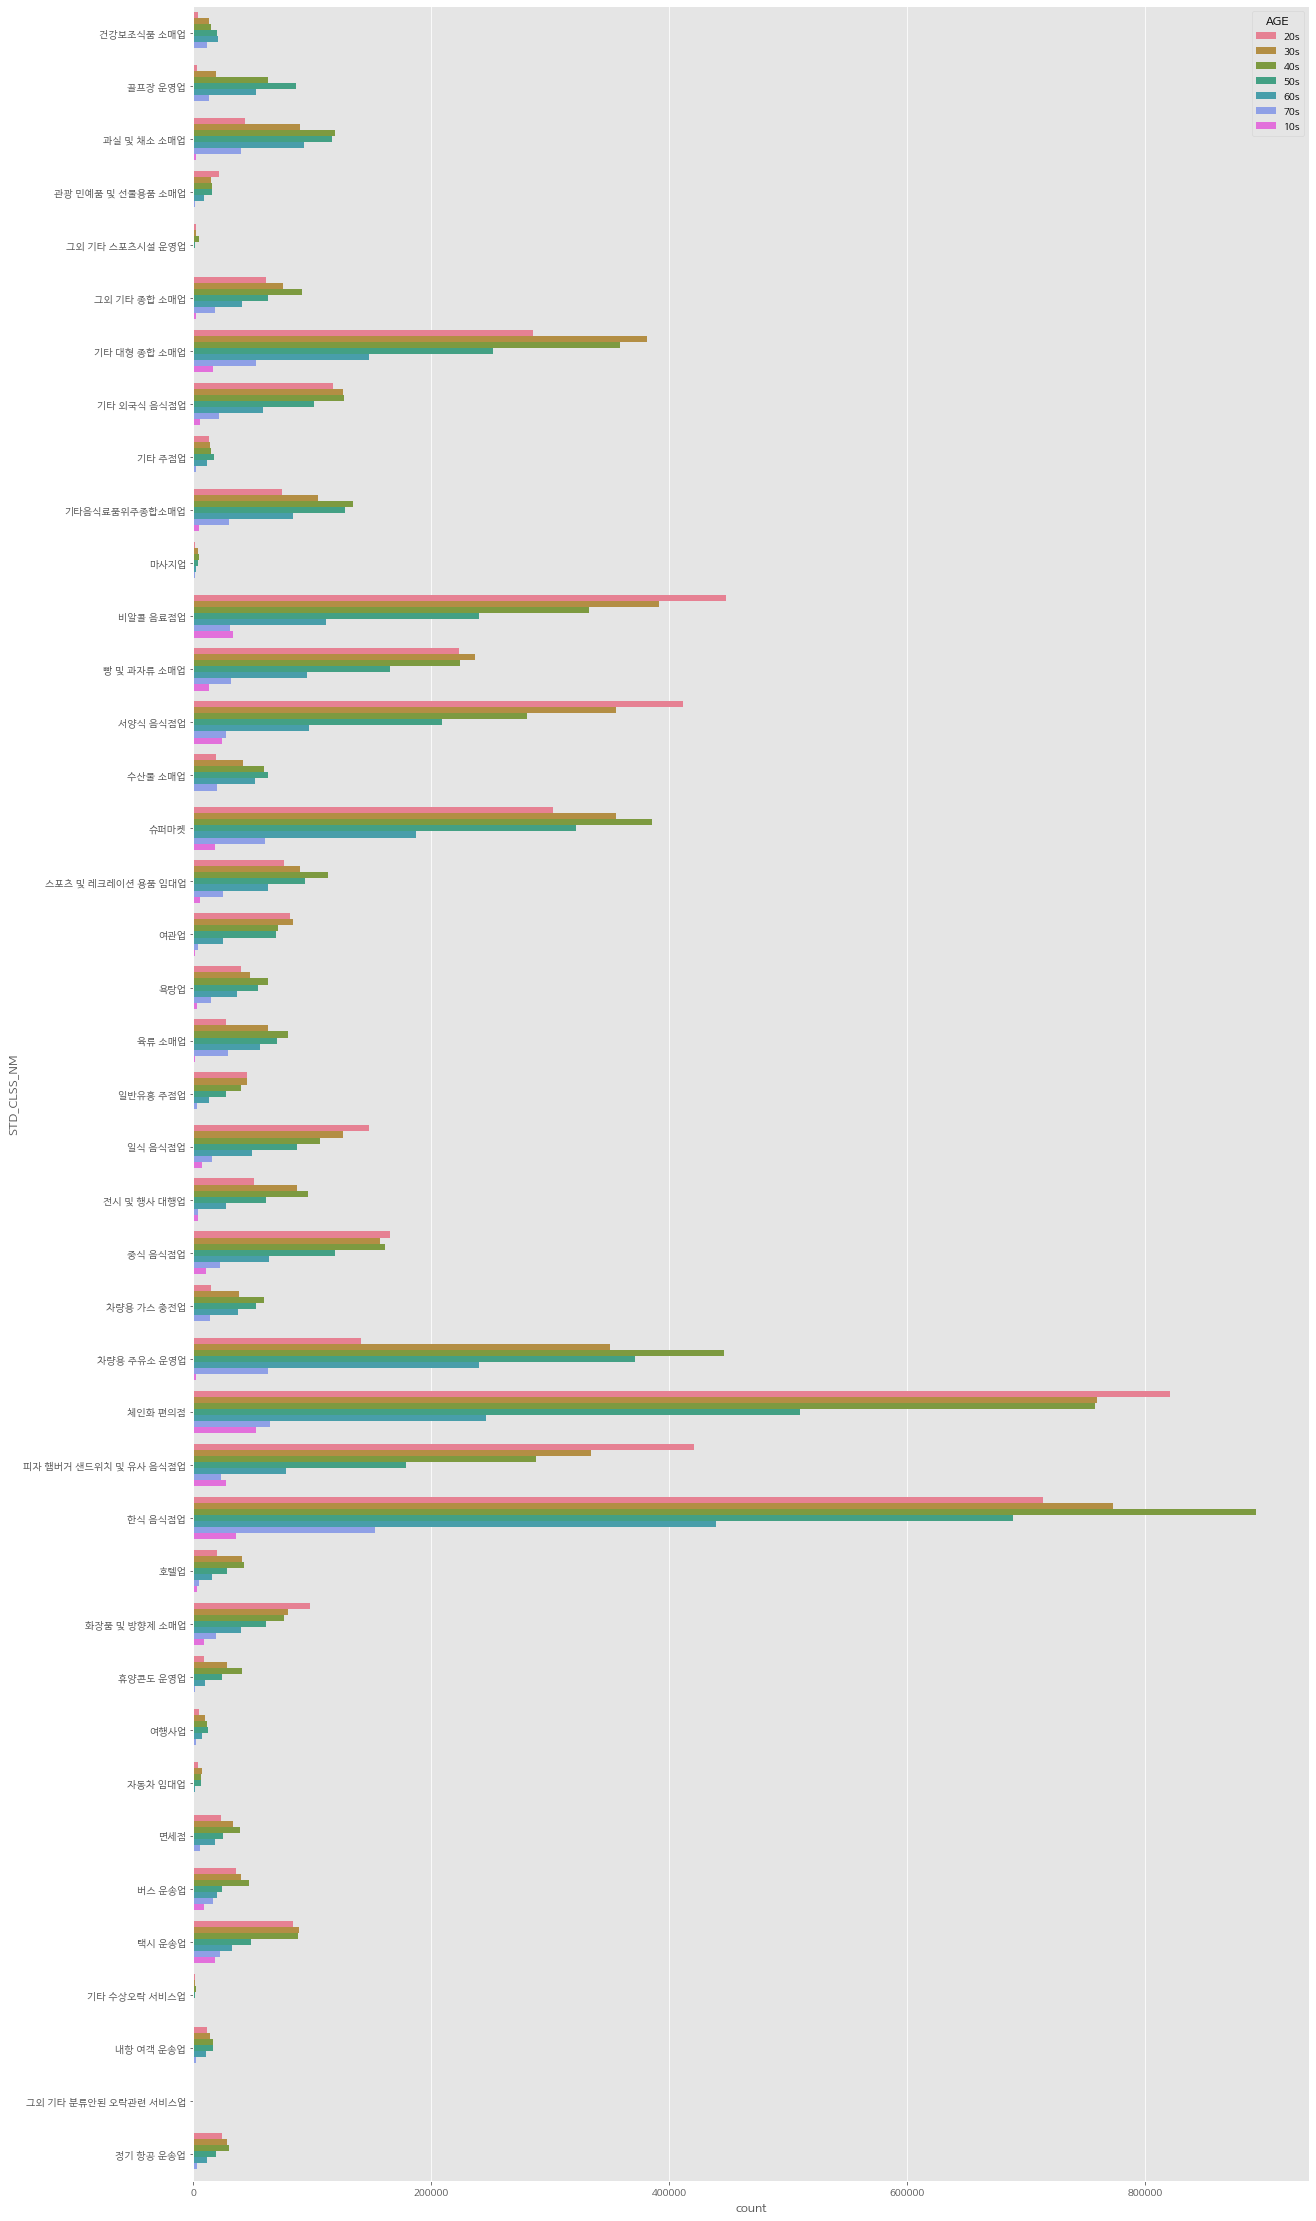

In [9]:
fig, ax = plt.subplots(figsize = (20,40))
sns.countplot(y = "STD_CLSS_NM", hue = "AGE", data = data, palette = 'husl', orient = 'v')
plt.show()

In [231]:
data["date"] = pd.to_datetime(data["REG_YYMM"],format='%Y%m')
pivot_table = data.pivot_table(index=["date", "FLC"], columns= "STD_CLSS_NM", values="AMT", aggfunc="sum")
pivot_table = pivot_table.groupby(level=1).apply(lambda x: x.apply(lambda x : (x - np.nanmean(x)) / np.std(x)))

In [225]:
pt_sum = pivot_table.groupby(level = 1).sum()

In [95]:
pt_sum_minmax = pt_sum.unstack().to_frame().rename(columns={0:"AMT"}).groupby(level=0).apply(lambda d : (d-np.min(d))/(np.max(d)-np.min(d)))
pt_sum_minmax = pt_sum_minmax.reset_index()

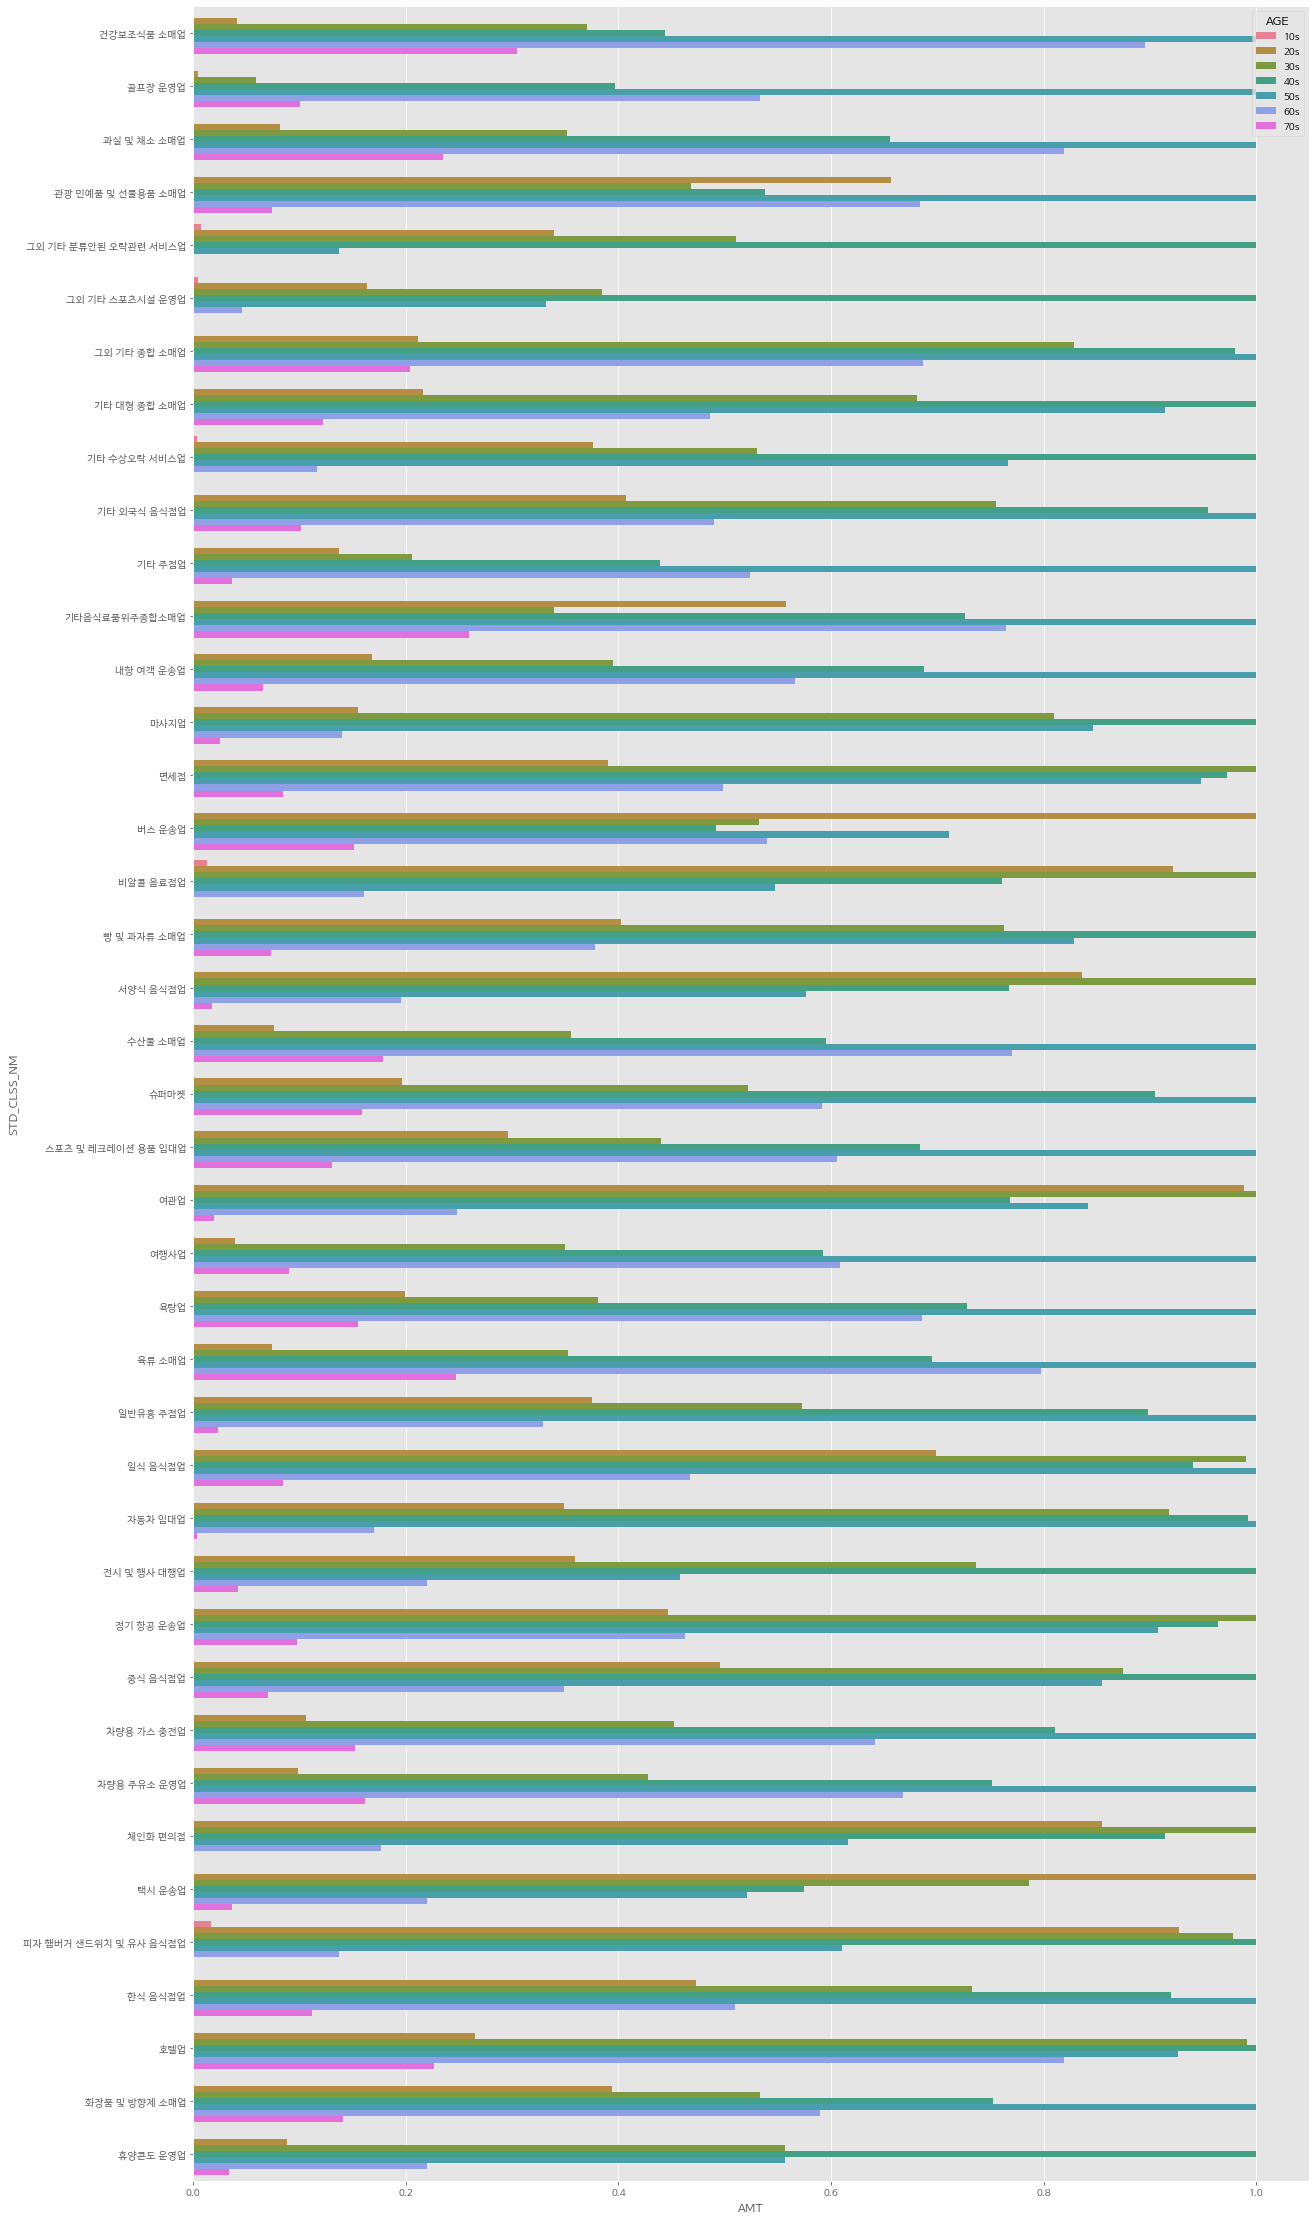

In [99]:
fig, ax = plt.subplots(figsize = (20, 40))
sns.barplot(x = "AMT", y = "STD_CLSS_NM", hue = "AGE", data = pt_sum_minmax, palette = "husl")
plt.show()

#20대 여관업 1위 달성
#대부분 업종에서 40, 50대 고객이 제일 많은 금액을 사용하는 것으로 나타남.
#10대와 60,70대 고객은 대부분 업종에서 가장 적은 금액을 이용함.
#나이 변수는 업종별과 관계없이 AMT를 예측하는데 좋은 feature가 될 수 있다고 생각됨.

In [75]:
pt_sum_df = pt_sum.unstack().to_frame().rename(columns = {0 : "AMT"}).reset_index()
pt_sum_df.head()

,STD_CLSS_NM,AGE,AMT
0,건강보조식품 소매업,10s,2.772250e+06
1,건강보조식품 소매업,20s,1.427434e+09
2,건강보조식품 소매업,30s,1.273904e+10
3,건강보조식품 소매업,40s,1.526748e+10
4,건강보조식품 소매업,50s,3.440160e+10


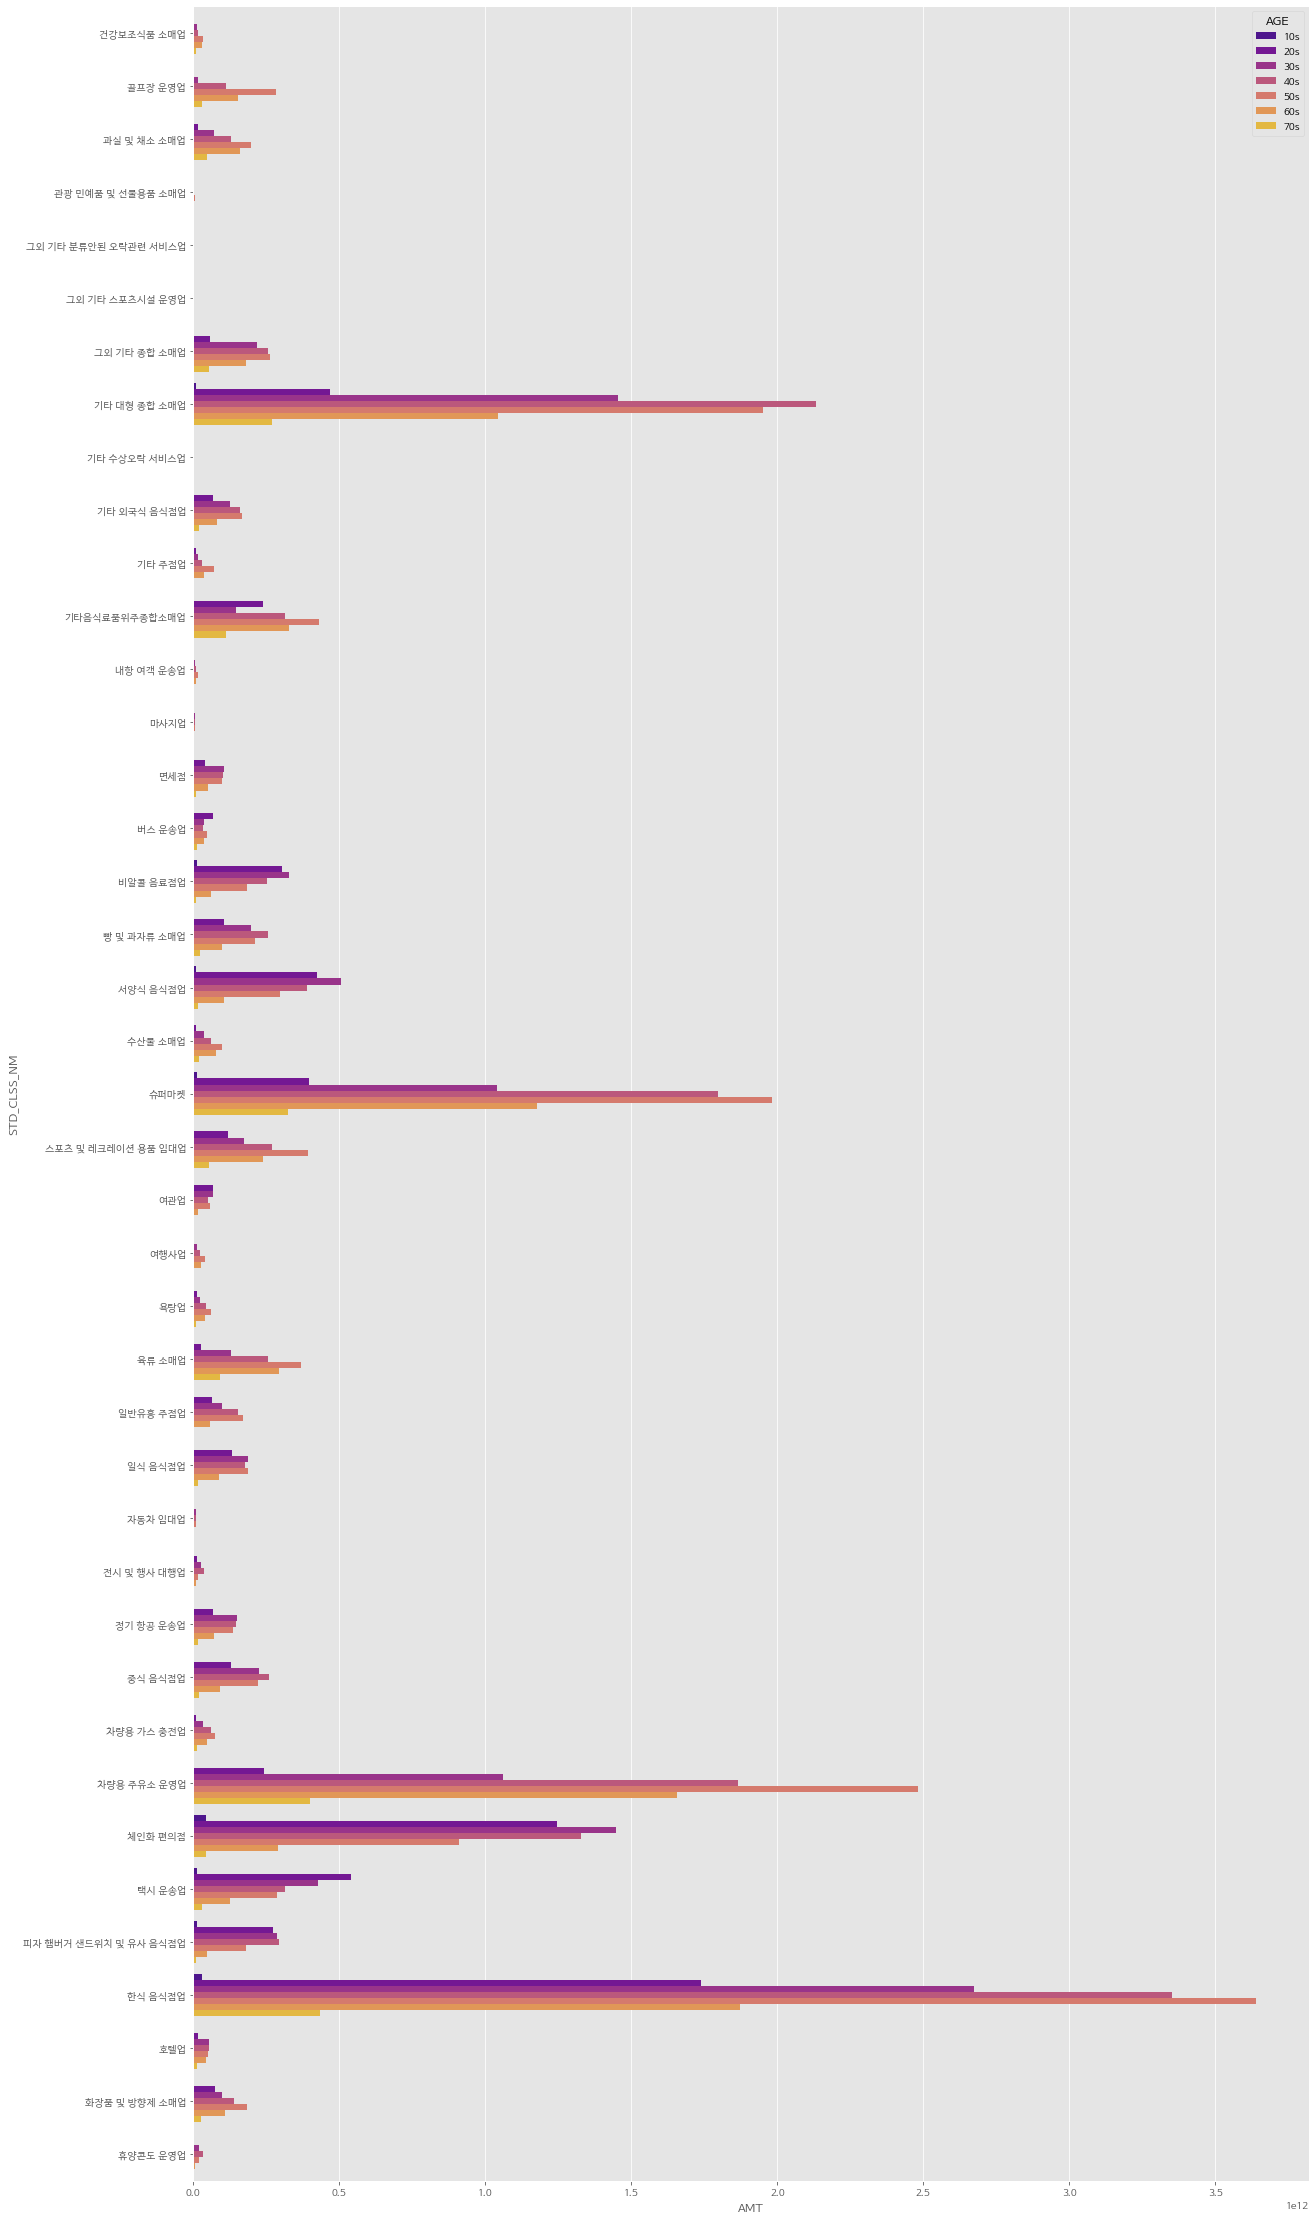

In [76]:
# 연령대에 따른 업종별 이용 금액
fig, ax = plt.subplots(figsize = (20, 40))
sns.barplot(x = "AMT", y = "STD_CLSS_NM", hue = "AGE", data = pt_sum_df, palette = "plasma")
plt.show()

In [232]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [233]:
def create_figure(df, col_num):

    rows = (len(df.columns) - 1) // col_num + 1
    cols = col_num

    subplot_titles = [col if len(col) < 10 else col[:9] for col in df.columns]
    figs = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles, vertical_spacing=0.05)

    group_column = df.index.names[1]

    for n_ax, col in enumerate(df.columns):
        n_row = n_ax // col_num + 1
        n_col = n_ax % col_num + 1

        lines = px.line(df.reset_index(), x="date", y=col, color=group_column)["data"]

        for line in lines:
            if n_ax != 0:
                line.showlegend = False
            figs.add_trace(
                line,
                row=n_row,
                col=n_col,
            )

    figs.update_layout(
        height=2000, font_family='NanumBarunGothic',
    )
    return figs

In [234]:
create_figure(pivot_table, 3)

In [245]:
#업종별로 2019년 3월,4월

df_std = data.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0:"AMT"}).reset_index()
df_std = df_std = df_std[(df_std["DATE"] == "2019-03") | (df_std["DATE"] == "2019-04")]
df_std = df_std.set_index("STD_CLSS_NM")
for std in df_std.index:
    try:
        tmp = df_std.loc[std]
        df_std.loc[std, "Diff"] = tmp[tmp["DATE"] == "2019-04"].AMT.values - tmp[tmp["DATE"] == "2019-03"].AMT.values
    except:
        continue

In [248]:
df_std[df_std["Diff"] < 0]

,DATE,AMT,Diff
STD_CLSS_NM,,,
건강보조식품 소매업,2019-03-01,6307887107,-1.182660e+08
과실 및 채소 소매업,2019-03-01,38415185909,-4.858676e+08
그외 기타 분류안된 오락관련 서비스업,2019-03-01,2005500,-6.050000e+04
그외 기타 스포츠시설 운영업,2019-03-01,231791910,-8.566681e+07
그외 기타 종합 소매업,2019-03-01,63325621140,-1.683549e+09
기타 대형 종합 소매업,2019-03-01,517323547314,-2.250585e+10
기타 수상오락 서비스업,2019-03-01,112604480,-3.523250e+06
기타 외국식 음식점업,2019-03-01,45944677941,-2.485053e+09
기타 주점업,2019-03-01,11736607723,-7.514151e+08


In [24]:
##업종별로 2월 3월 AMT차

df_std = data.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0:"AMT"}).reset_index()
df_std = df_std[(df_std["DATE"] == "2020-02") | (df_std["DATE"] == "2020-03")]
df_std = df_std.set_index("STD_CLSS_NM")
for std in STD_CLSS_NMs:
    tmp = df_std.loc[std]
    df_std.loc[std, "Diff"] = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values
df_std.head()

,DATE,AMT,Diff
STD_CLSS_NM,,,
건강보조식품 소매업,2020-02-01,5340082879,4.135940e+08
골프장 운영업,2020-02-01,18228841136,2.117001e+10
과실 및 채소 소매업,2020-02-01,34708535677,7.782543e+09
관광 민예품 및 선물용품 소매업,2020-02-01,531651593,-6.791037e+07
그외 기타 분류안된 오락관련 서비스업,2020-02-01,1379750,2.004500e+05


In [29]:
df_std[df_std["Diff"] > 0]

,DATE,AMT,Diff
STD_CLSS_NM,,,
건강보조식품 소매업,2020-02-01,5340082879,4.135940e+08
골프장 운영업,2020-02-01,18228841136,2.117001e+10
과실 및 채소 소매업,2020-02-01,34708535677,7.782543e+09
그외 기타 분류안된 오락관련 서비스업,2020-02-01,1379750,2.004500e+05
그외 기타 종합 소매업,2020-02-01,62824829847,9.385329e+09
기타 대형 종합 소매업,2020-02-01,383675206614,3.695374e+10
기타 수상오락 서비스업,2020-02-01,52191400,1.923768e+07
기타음식료품위주종합소매업,2020-02-01,97202780806,2.036709e+10
내항 여객 운송업,2020-02-01,1233565982,9.062834e+07


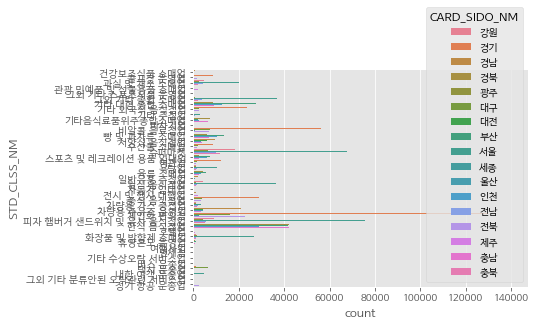

In [47]:
# CARD_SIDO_NM 별로 STD_CLSS_NM



In [220]:
df_reg = data[(data["DATE"] == "2020-02") | (data["DATE"] == "2020-03")]
df_reg = df_reg.groupby(["DATE", "CARD_SIDO_NM", "STD_CLSS_NM", "FLC"])["AMT"].sum().to_frame().reset_index()
df_reg = df_reg.set_index(["CARD_SIDO_NM", "STD_CLSS_NM", "FLC"])
FLCs = data.FLC.unique()
for index in df_reg.index:
            try:
                tmp = df_reg.loc[index]
                mar = float(tmp[tmp["DATE"] == "2020-03"].AMT.values)
                feb = float(tmp[tmp["DATE"] == "2020-02"].AMT.values)
                if mar > feb:    
                    df_reg.loc[index, "Diff"] = (mar - feb) * (feb / mar)
                else:
                    df_reg.loc[index, "Diff"] = (mar - feb) * (mar / feb)
            except:
                continue

In [221]:
df_reg["FINAL_AMT"] = df_reg["AMT"] + df_reg["Diff"]
df_reg = df_reg[df_reg["DATE"] == "2020-03"]
df_reg = df_reg.groupby(["CARD_SIDO_NM", "STD_CLSS_NM"])["FINAL_AMT"].sum().to_frame()

In [222]:
df_reg = df_reg.reset_index()

In [252]:
df_reg[df_reg["FINAL_AMT"] < 0]

,CARD_SIDO_NM,STD_CLSS_NM,FINAL_AMT


In [184]:
df_reg = data[(data["DATE"] == "2020-02") | (data["DATE"] == "2020-03")]
df_reg = df_reg.groupby(["DATE", "CARD_SIDO_NM", "STD_CLSS_NM", "FLC"])["AMT"].sum().to_frame().reset_index()
df_reg = df_reg.set_index(["CARD_SIDO_NM", "STD_CLSS_NM", "FLC"])

In [188]:
#df_reg = df_reg[df_reg["DATE"] == "2020-02"]
#df_reg["FINAL_AMT"] = df_reg["AMT"] + df_reg["Diff"]
df_reg.loc["강원", "자동차 임대업"]
data[(data["CARD_SIDO_NM"] == "강원") & (data["STD_CLSS_NM"] == "자동차 임대업") & (data["DATE"] == "2020-03")]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,DATE
23441347,202003,강원,강릉시,자동차 임대업,강원,강릉시,50s,1,4,3,1477000,3,2020-03-01
23463568,202003,강원,원주시,자동차 임대업,강원,원주시,30s,1,2,3,1810000,4,2020-03-01
23463569,202003,강원,원주시,자동차 임대업,강원,원주시,50s,1,4,3,1320000,8,2020-03-01


In [161]:
new_df = df_reg.groupby(["CARD_SIDO_NM", "STD_CLSS_NM"])["FINAL_AMT"].sum().to_frame()
new_df[(new_df["FINAL_AMT"] < 100)]

FINAL_AMT
CARD_SIDO_NM STD_CLSS_NM                 
강원           기타 수상오락 서비스업       -518500.0
             자동차 임대업                  0.0
             전시 및 행사 대행업     -532029530.0
             호텔업             -546382320.0
             휴양콘도 운영업        -644617633.0
...                                   ...
충남           여행사업              -2455800.0
             호텔업              -20947480.0
충북           그외 기타 스포츠시설 운영업    -794750.0
             마사지업              -1025000.0
             휴양콘도 운영업         -21618850.0

[66 rows x 1 columns]

In [251]:
submission = pd.read_csv('C:/Users/chowonjae/Desktop/jeju_data_ver1/submission.csv', index_col=0)
submission = submission.loc[submission['REG_YYMM']==202004]
submission = submission[['CARD_SIDO_NM', 'STD_CLSS_NM']]
submission = submission.merge(df_reg, left_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission = submission.fillna(0)
AMT = list(submission['FINAL_AMT'])*2

submission = pd.read_csv('C:/Users/chowonjae/Desktop/jeju_data_ver1/submission.csv', index_col=0)
submission['AMT'] = AMT
submission.to_csv('credit_submission1.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,1.110039e+08
1,202004,강원,골프장 운영업,3.541473e+09
2,202004,강원,과실 및 채소 소매업,1.103793e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,1.212750e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,0.000000e+00


In [250]:
submission

,CARD_SIDO_NM,STD_CLSS_NM,FINAL_AMT
0,강원,건강보조식품 소매업,1.110039e+08
1,강원,골프장 운영업,3.541473e+09
2,강원,과실 및 채소 소매업,1.103793e+09
3,강원,관광 민예품 및 선물용품 소매업,1.212750e+07
4,강원,그외 기타 분류안된 오락관련 서비스업,0.000000e+00
...,...,...,...
692,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.423830e+09
693,충북,한식 음식점업,1.506041e+10
694,충북,호텔업,1.810183e+07
695,충북,화장품 및 방향제 소매업,3.768029e+08


In [74]:
df_reg = data[(data["DATE"] == "2020-02") | (data["DATE"] == "2020-03")]
df_reg = df_reg.groupby(["DATE", "CARD_SIDO_NM", "STD_CLSS_NM", "FLC"])["AMT"].sum().to_frame().reset_index()
df_reg = df_reg.set_index(["CARD_SIDO_NM", "STD_CLSS_NM", "FLC"])
tmp = df_reg.loc["강원", "건강보조식품 소매업", 1]
df_reg.loc[("강원", "건강보조식품 소매업", 1), "Diff"] = 0
df_reg.loc['강원', '자동차 임대업', 1]

,,,DATE,AMT,Diff
CARD_SIDO_NM,STD_CLSS_NM,FLC,,,
강원,자동차 임대업,1,2020-02-01,1421800,NaN


# DATA ENGINEER

- 1월 2월 3월 데이터를 이용하는 것이 가장 좋아보임. (다른 코드들에도 가장 많이 쓴 방법)
- 업종을 4개에서 5개의 feature로 나누자.(?) -> FLC별로 2월 3월 AMT차에따라 업종별로 feature 생성 -> 업종별로 2월 3월 AMT차에 따라 feature 생성?
- FLC, AGE를 이용하자.
- CARD_SIDO_NM은 어떻게 사용할 것인가... -> groupby(CARD_SIDO_NM, STD_CLSS_NM, FLC)하고 2월 3월 AMT차를 3월 데이터 AMT에 적용해서 예측 
- CARD_CCG_NM, HOM_SIDO_NM, HOM_CCG_NM, SEX_CTGO_CD, CSTMR_CNT, AMT, CNT (drop)

In [230]:
# data initialize

data = pd.read_csv('C:/Users/chowonjae/Desktop/jeju_data_ver1/201901-202003.csv')
data["DATE"] = pd.to_datetime(data["REG_YYMM"],format='%Y%m')

In [34]:
# January, February, March, 2020

data = data[(data["DATE"] == "2020-01") | (data["DATE"] == "2020-02") | (data["DATE"] == "2020-03")]
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,DATE
20425415,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,2,1,3,345000,3,2020-01-01
20425416,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,3,1903450,3,2020-01-01
20425417,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,14,1520500,15,2020-01-01
20425418,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,9,1239200,9,2020-01-01
20425419,202001,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,606700,4,2020-01-01


In [156]:
# FLC별로 2월 3월 AMT차에따라 업종별로 feature 생성 - 1이면 4월에도 이용금액 올라갈 가능성 높음, 0 이면 4월에도 이용금액 내려갈 가능성 높음

FLCs = data.FLC.unique()
new_data = pd.DataFrame(index = range(0), columns = ["DATE", "AMT", "Diff"])
new_data.index.names = ["STD_CLSS_NM"]

for FLC in FLCs:
    df_flc = data[(data["FLC"] == FLC)]
    df_flc_reg_part = df_flc.groupby(["DATE", "STD_CLSS_NM"])["AMT"].sum().to_frame().rename(columns = {0 : "AMT"})
    df_flc_reg_part = df_flc_reg_part.reset_index()
    df_reg_part = df_flc_reg_part[(df_flc_reg_part["DATE"] == "2020-02-01") | (df_flc_reg_part["DATE"] == "2020-03-01")].set_index("STD_CLSS_NM")
    for std in df_reg_part.index:
        tmp = df_reg_part.loc[std]
        try:    
            diff = tmp[tmp["DATE"] == "2020-03"].AMT.values - tmp[tmp["DATE"] == "2020-02"].AMT.values
        except:
            continue
        df_reg_part.loc[std, "Diff"]  = diff
#         if(diff > 0):  # 2020년 2월보다 3월의 이용금액이 증가한 업종
#             df_reg_part.loc[std, "Diff"] = 1
#         else: # 2020년 2월보다 3월의 이용금액이 감소한 업종
#             df_reg_part.loc[std, "Diff"] = 0
    
    df_reg_part["FLC"] = FLC
    
    new_data = new_data.append(df_reg_part)
    
    

- 먼저 FLC별로 Diff 계산해서 2020년 3월 데이터 groupby("CARD_SIDO_NM")

In [157]:
new_data

,DATE,AMT,Diff,FLC
STD_CLSS_NM,,,,
건강보조식품 소매업,2020-02-01,69107220,-9.529993e+06,1.0
골프장 운영업,2020-02-01,75917855,-2.481688e+07,1.0
과실 및 채소 소매업,2020-02-01,1111639961,-5.025060e+06,1.0
관광 민예품 및 선물용품 소매업,2020-02-01,117377705,-3.075828e+07,1.0
그외 기타 분류안된 오락관련 서비스업,2020-02-01,427500,-7.180000e+04,1.0
...,...,...,...,...
피자 햄버거 샌드위치 및 유사 음식점업,2020-03-01,3722461253,5.403872e+08,5.0
한식 음식점업,2020-03-01,101349565556,-1.120882e+10,5.0
호텔업,2020-03-01,1273733021,-2.065448e+09,5.0


- 2019.2 - 3 - 4월 데이터
- 2020.2 - 3월 데이터